In [1]:
import pandas as pd

# Load the dataset
file_path =("C:\\Users\\sathe\\OneDrive\\Desktop\\MAJOR PROJECT\\global-data-on-sustainable-energy (1).csv")
df= pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fo

In [2]:
df.shape

(3649, 21)

In [3]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_

In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [5]:
# Filter data for India
df_Germany = df[df["Entity"] == "Germany"]

# Select relevant columns
df_Germany = df_Germany[["Year", "Entity", "Primary energy consumption per capita (kWh/person)"]]

In [6]:
# Sort data by 'Year'
df_Germany = df_Germany.sort_values(by="Year")

# Ensure 'Year' is in numeric format
df_Germany["Year"] = pd.to_numeric(df_Germany["Year"], errors="coerce")

# Drop rows with invalid or missing Year
df_Germany = df_Germany.dropna(subset=["Year"])

# Reset the index
df_Germany = df_Germany.reset_index(drop=True)


In [7]:
# Set 'Year' as the index
df_Germany.set_index('Year', inplace=True)

# Verify the index
print(df_Germany.index)


Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int64', name='Year')


In [8]:
df_Germany

,Entity,Primary energy consumption per capita (kWh/person)
Year,,
2000,Germany,48903.700
2001,Germany,49841.387
2002,Germany,49257.790
2003,Germany,49300.902
2004,Germany,49342.406
2005,Germany,48793.566
2006,Germany,50043.030
2007,Germany,47958.130
2008,Germany,48445.984


In [9]:
df_Germany.columns

Index(['Entity', 'Primary energy consumption per capita (kWh/person)'], dtype='object')

ADF Statistic (Original): -0.3796505972382149
p-value (Original): 0.913441358085664
Time series is non-stationary. Applying first-order differencing.

ADF Statistic (First-order Differenced): -6.220546139768737
p-value (First-order Differenced): 5.236352450259817e-08
First-order differenced series is stationary. Proceeding with AR model.


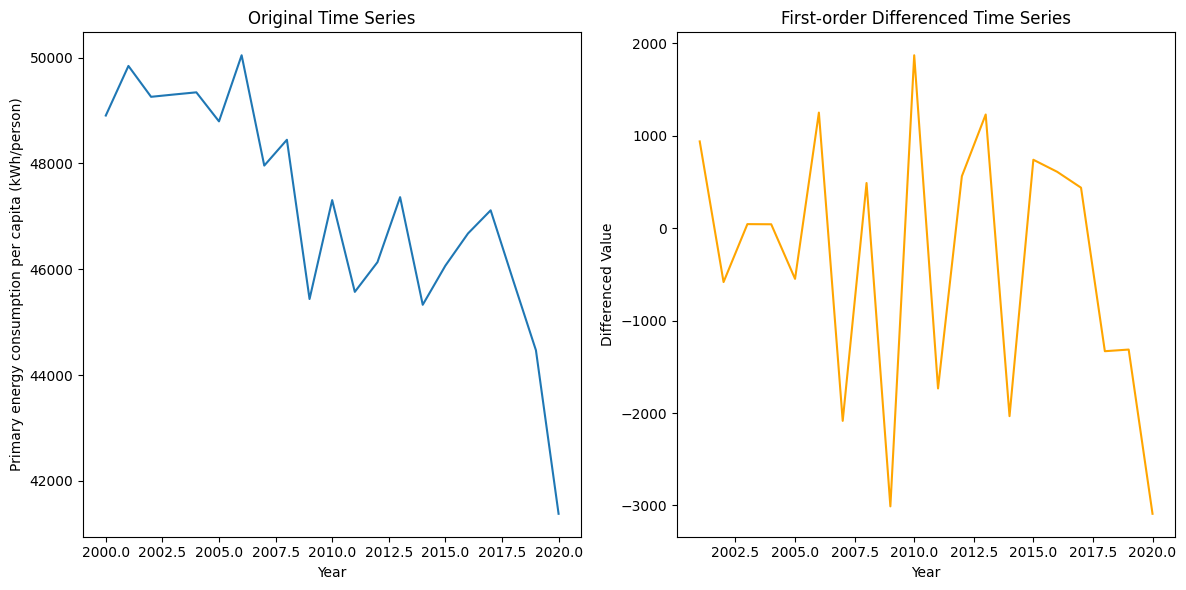

In [10]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Extract the target time series
time_series = df_Germany["Primary energy consumption per capita (kWh/person)"].values

# Perform ADF Test for stationarity on the original series
adf_result = adfuller(time_series)
print("ADF Statistic (Original):", adf_result[0])
print("p-value (Original):", adf_result[1])

if adf_result[1] > 0.05:
    print("Time series is non-stationary. Applying first-order differencing.")

    # First-order differencing
    diff_1 = np.diff(time_series)

    # ADF Test after first-order differencing
    adf_result_diff_1 = adfuller(diff_1)
    print("\nADF Statistic (First-order Differenced):", adf_result_diff_1[0])
    print("p-value (First-order Differenced):", adf_result_diff_1[1])

    if adf_result_diff_1[1] < 0.05:
        print("First-order differenced series is stationary. Proceeding with AR model.")
    else:
        print("First-order differenced series is still non-stationary.")
else:
    print("Time series is stationary. Proceeding with AR model.")

# Plot the original and differenced series for visualization
plt.figure(figsize=(12, 6))

# Original series plot
plt.subplot(1, 2, 1)
plt.plot(df_Germany.index, time_series, label="Original")
plt.title("Original Time Series")
plt.xlabel("Year")
plt.ylabel("Primary energy consumption per capita (kWh/person)")

# First-order differenced series plot
plt.subplot(1, 2, 2)
plt.plot(df_Germany.index[1:], diff_1, label="First-order Differenced", color="orange")
plt.title("First-order Differenced Time Series")
plt.xlabel("Year")
plt.ylabel("Differenced Value")

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

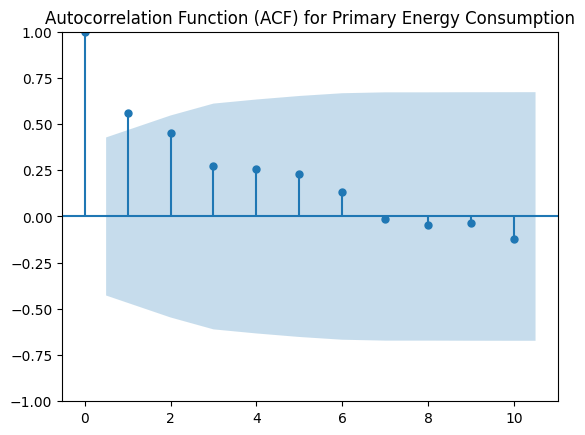

<Figure size 1200x600 with 0 Axes>

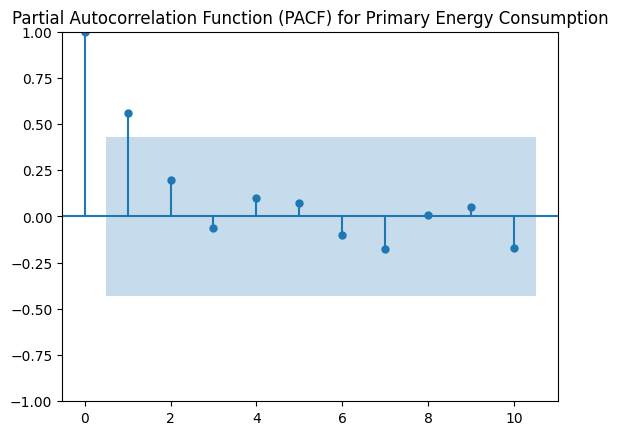

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df_india is your DataFrame and the target column is "Primary energy consumption per capita (kWh/person)"

# Extract the target time series (India's energy consumption data)
time_series = df_Germany["Primary energy consumption per capita (kWh/person)"]

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(time_series, lags=10)  # Adjust lags based on the data
plt.title("Autocorrelation Function (ACF) for Primary Energy Consumption")
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(time_series, lags=10)  # Adjust lags based on the data
plt.title("Partial Autocorrelation Function (PACF) for Primary Energy Consumption")
plt.show()


Mean Squared Error (MSE): 7.224531306148858e+68
Mean Absolute Error (MAE): 2.429407544790621e+34


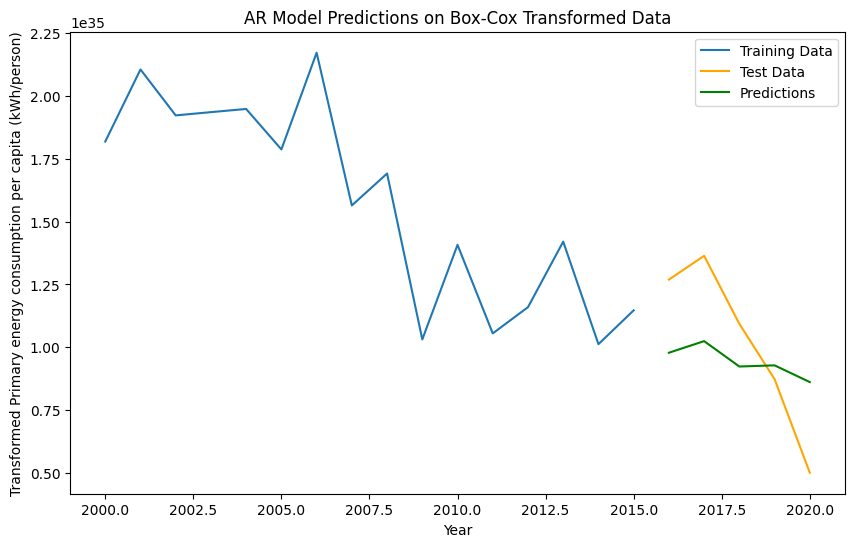

In [12]:

from scipy.stats import boxcox
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Extract the target time series (Primary energy consumption per capita)
time_series = df_Germany["Primary energy consumption per capita (kWh/person)"].values

# Perform Box-Cox transformation (ensure all values are positive)
if np.any(time_series <= 0):
    print("Time series contains non-positive values. Box-Cox transformation requires positive values.")
else:
    # Apply Box-Cox transformation
    transformed_series, lambda_value = boxcox(time_series)
    df_Germany["BoxCox_Transformed"] = transformed_series

    # Split the transformed data into training and testing sets
    train_size = int(len(transformed_series) * 0.8)  # 80% training, 20% testing
    train, test = transformed_series[:train_size], transformed_series[train_size:]

    # Fit AR model on training data
    model = AutoReg(train, lags=2)  # AR(2) model
    model_fitted = model.fit()

    # Make predictions on the test data
    predictions = model_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

    # Evaluate the model using Mean Squared Error (MSE) and Mean Absolute Error (MAE)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_Germany.index[:len(train)], train, label='Training Data')
    plt.plot(df_Germany.index[len(train):], test, label='Test Data', color='orange')
    plt.plot(df_Germany.index[len(train):], predictions, label='Predictions', color='green')
    plt.title('AR Model Predictions on Box-Cox Transformed Data')
    plt.xlabel('Year')
    plt.ylabel('Transformed Primary energy consumption per capita (kWh/person)')
    plt.legend()
    plt.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

# Extract the target time series (India's energy consumption data)
time_series = df_Germany["Primary energy consumption per capita (kWh/person)"]
# Use auto_arima to automatically find the best ARIMA model
model = auto_arima(time_series, seasonal=True, m=1, stepwise=True, trace=True)

# Display the summary of the model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=350.097, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=351.188, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=353.496, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=353.102, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=350.539, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=355.808, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=356.865, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=354.996, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=358.881, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=358.853, Time=0.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=362.810, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=350.071, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=356.484, Time

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

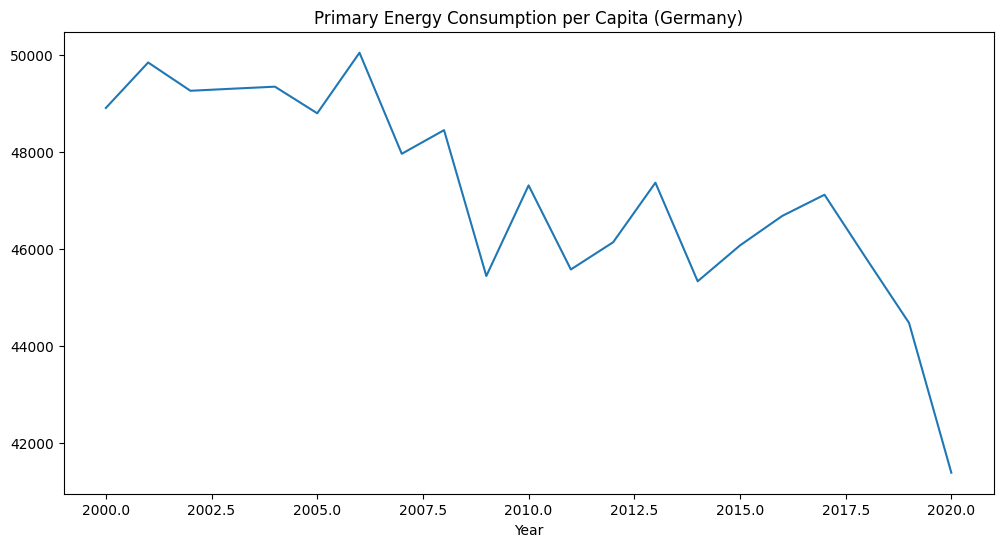

In [15]:
time_series = df_Germany["Primary energy consumption per capita (kWh/person)"]

# Plot the time series to visualize
time_series.plot(figsize=(12, 6))
plt.title('Primary Energy Consumption per Capita (Germany)')
plt.show()


# Manual method for p,d,q values

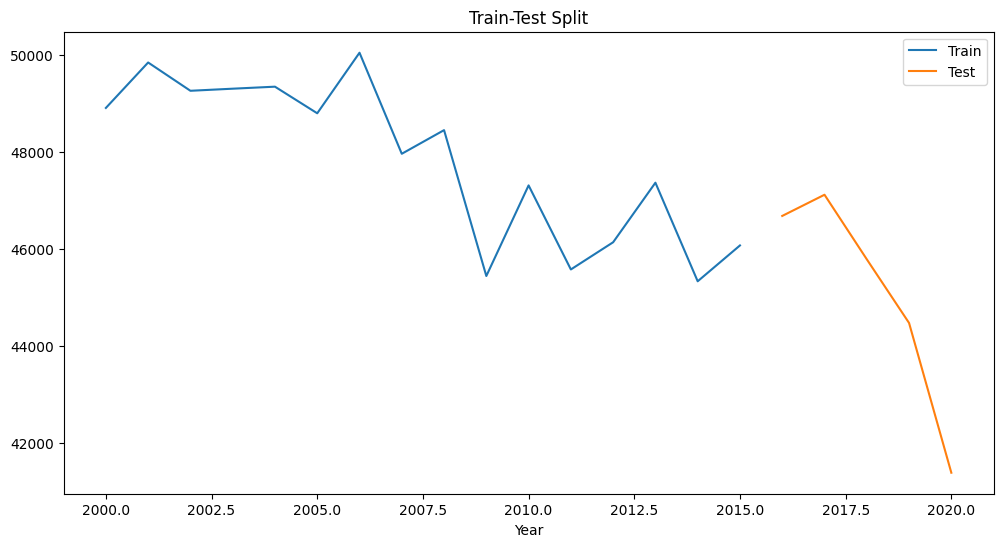

In [16]:
# 1. Split the data into training and testing sets (80% for training and 20% for testing)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Visualize the train-test split
train.plot(figsize=(12, 6), label='Train')
test.plot(label='Test')
plt.legend()
plt.title('Train-Test Split')
plt.show()

Mean Squared Error (MSE): 1.2379120766116252e+69
Mean Absolute Error (MAE): 2.679732579531836e+34


c:\Users\sathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


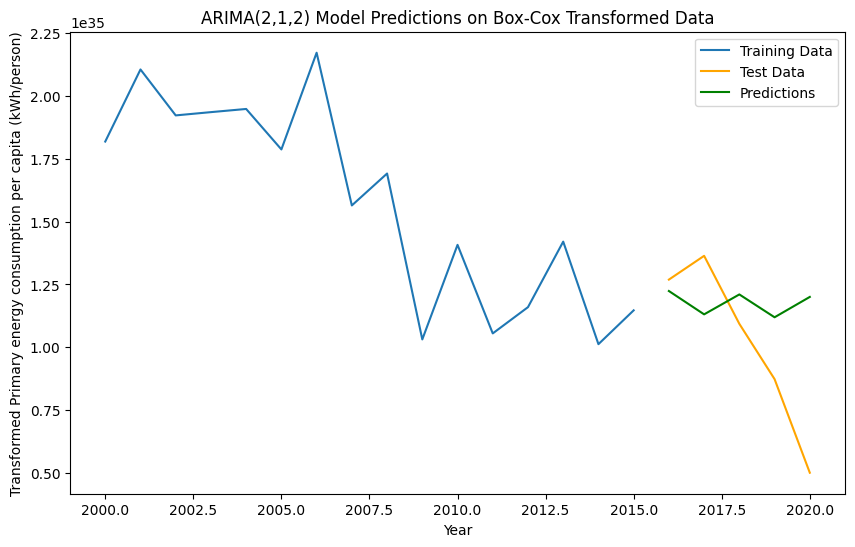

In [17]:
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Extract the target time series (Primary energy consumption per capita)
time_series = df_Germany["Primary energy consumption per capita (kWh/person)"].values

# Perform Box-Cox transformation (ensure all values are positive)
if np.any(time_series <= 0):
    print("Time series contains non-positive values. Box-Cox transformation requires positive values.")
else:
    # Apply Box-Cox transformation
    transformed_series, lambda_value = boxcox(time_series)
    df_Germany["BoxCox_Transformed"] = transformed_series

    # Split the transformed data into training and testing sets
    train_size = int(len(transformed_series) * 0.8)  # 80% training, 20% testing
    train, test = transformed_series[:train_size], transformed_series[train_size:]

    # Fit ARIMA(2, 1, 2) model on training data
    model = ARIMA(train, order=(2, 1, 2))
    model_fitted = model.fit()

    # Make predictions on the test data
    predictions = model_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

    # Evaluate the model using Mean Squared Error (MSE) and Mean Absolute Error (MAE)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_Germany.index[:len(train)], train, label='Training Data')
    plt.plot(df_Germany.index[len(train):], test, label='Test Data', color='orange')
    plt.plot(df_Germany.index[len(train):], predictions, label='Predictions', color='green')
    plt.title('ARIMA(2,1,2) Model Predictions on Box-Cox Transformed Data')
    plt.xlabel('Year')
    plt.ylabel('Transformed Primary energy consumption per capita (kWh/person)')
    plt.legend()
    plt.show()


c:\Users\sathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\sathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\sathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\t

The optimal value of q with the least MSE is: 3

Comparison of MSE for different q values:
   q Value           MSE
0        1  2.045823e+69
1        2  2.665072e+69
2        3  2.017992e+69
3        4  2.159903e+69
4        5  2.217812e+69
5        6  2.309215e+69
6        7  2.657678e+69
7        8  2.621172e+69
8        9  2.649884e+69


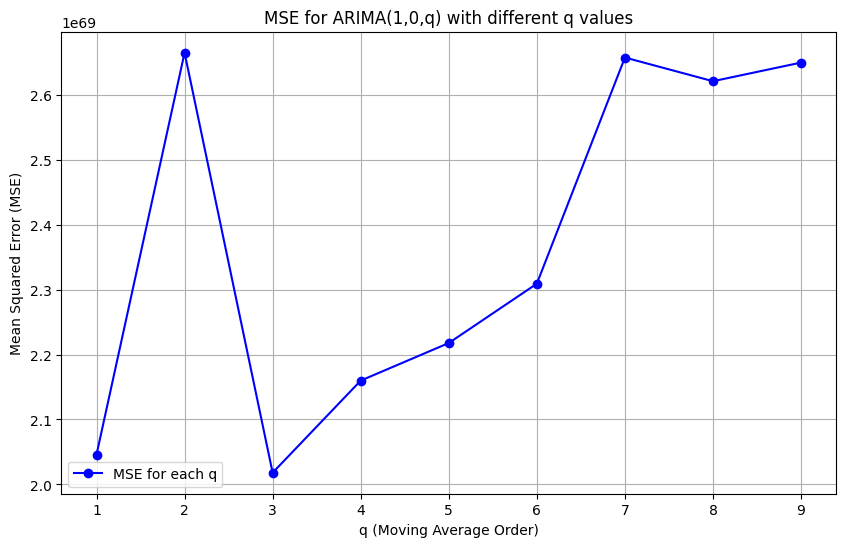

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import boxcox


# Extract the target time series (Primary energy consumption per capita)
time_series = df_Germany["Primary energy consumption per capita (kWh/person)"].values

# Perform Box-Cox transformation (ensure all values are positive)
if np.any(time_series <= 0):
    print("Time series contains non-positive values. Box-Cox transformation requires positive values.")
else:
    # Apply Box-Cox transformation
    transformed_series, lambda_value = boxcox(time_series)
    df_Germany["BoxCox_Transformed"] = transformed_series

    # Split the transformed data into training and testing sets
    train_size = int(len(transformed_series) * 0.8)  # 80% training, 20% testing
    train, test = transformed_series[:train_size], transformed_series[train_size:]

    mse_values = []
    q_values = range(1, 10)

    # Try different values of q (1 to 9)
    for q in q_values:
        # Fit ARIMA(1, 0, q) model on training data
        model = ARIMA(train, order=(1, 0, q))
        model_fitted = model.fit()

        # Make predictions on the test data
        predictions = model_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

        # Calculate the Mean Squared Error (MSE)
        mse = mean_squared_error(test, predictions)
        mse_values.append(mse)

    # Create a DataFrame to display the results
    results_df = pd.DataFrame({
        'q Value': q_values,
        'MSE': mse_values
    })

    # Find the optimal q with the least MSE
    optimal_q = q_values[np.argmin(mse_values)]
    print(f"The optimal value of q with the least MSE is: {optimal_q}")

    # Display the comparison table
    print("\nComparison of MSE for different q values:")
    print(results_df)

    # Plot the MSE values for each q
    plt.figure(figsize=(10, 6))
    plt.plot(q_values, mse_values, marker='o', color='b', label="MSE for each q")
    plt.xlabel('q (Moving Average Order)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('MSE for ARIMA(1,0,q) with different q values')
    plt.xticks(q_values)
    plt.grid(True)
    plt.legend()
    plt.show()



Comparison of MSE for different p values (q=3, d=0):
   p Value           MSE
0        1  1.325404e+69
1        2  1.347048e+69
2        3  1.063451e+69
3        4  1.191313e+69
4        5  1.548575e+69
5        6  1.514357e+69
6        7  7.870131e+69
7        8  8.229449e+69
8        9  1.356849e+70

Optimal p value with the least MSE: 3


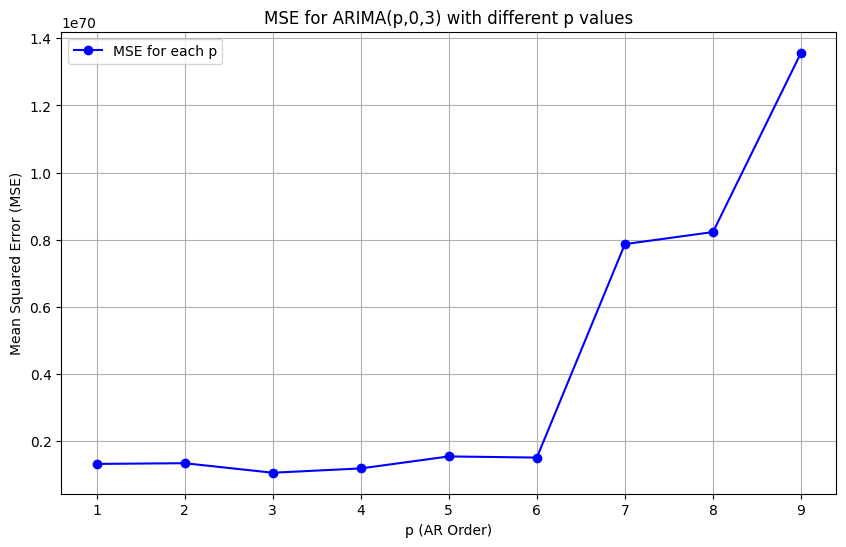

In [19]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Suppress warnings
warnings.filterwarnings("ignore")

# Extract the target time series (Primary energy consumption per capita)
time_series = df_Germany["Primary energy consumption per capita (kWh/person)"].values

# Perform Box-Cox transformation (ensure all values are positive)
if np.any(time_series <= 0):
    print("Time series contains non-positive values. Box-Cox transformation requires positive values.")
else:
    # Apply Box-Cox transformation
    transformed_series, lambda_value = boxcox(time_series)
    df_Germany["BoxCox_Transformed"] = transformed_series

    # Split the transformed data into training and testing sets
    train_size = int(len(transformed_series) * 0.8)  # 80% training, 20% testing
    train, test = transformed_series[:train_size], transformed_series[train_size:]

    mse_values = []
    p_values = range(1, 10)
    q_value = 3  # Fixed q = 3
    d_value = 1  # Fixed d = 0

    # Try different values of p (1 to 9) and fixed q=3
    for p in p_values:
        # Fit ARIMA(p, 0, 3) model on training data
        model = ARIMA(train, order=(p, d_value, q_value))
        model_fitted = model.fit()

        # Make predictions on the test data
        predictions = model_fitted.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

        # Calculate the Mean Squared Error (MSE)
        mse = mean_squared_error(test, predictions)
        mse_values.append(mse)

    # Create a DataFrame to display the results
    results_df = pd.DataFrame({
        'p Value': p_values,
        'MSE': mse_values
    })

    # Display the comparison table
    print("\nComparison of MSE for different p values (q=3, d=0):")
    print(results_df)

    # Find the optimal p value with the least MSE
    optimal_p = results_df.loc[results_df['MSE'].idxmin(), 'p Value']
    print("\nOptimal p value with the least MSE:", optimal_p)

    # Plot the MSE values for each p
    plt.figure(figsize=(10, 6))
    plt.plot(p_values, mse_values, marker='o', color='b', label="MSE for each p")
    plt.xlabel('p (AR Order)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('MSE for ARIMA(p,0,3) with different p values')
    plt.xticks(p_values)
    plt.grid(True)
    plt.legend()
    plt.show()


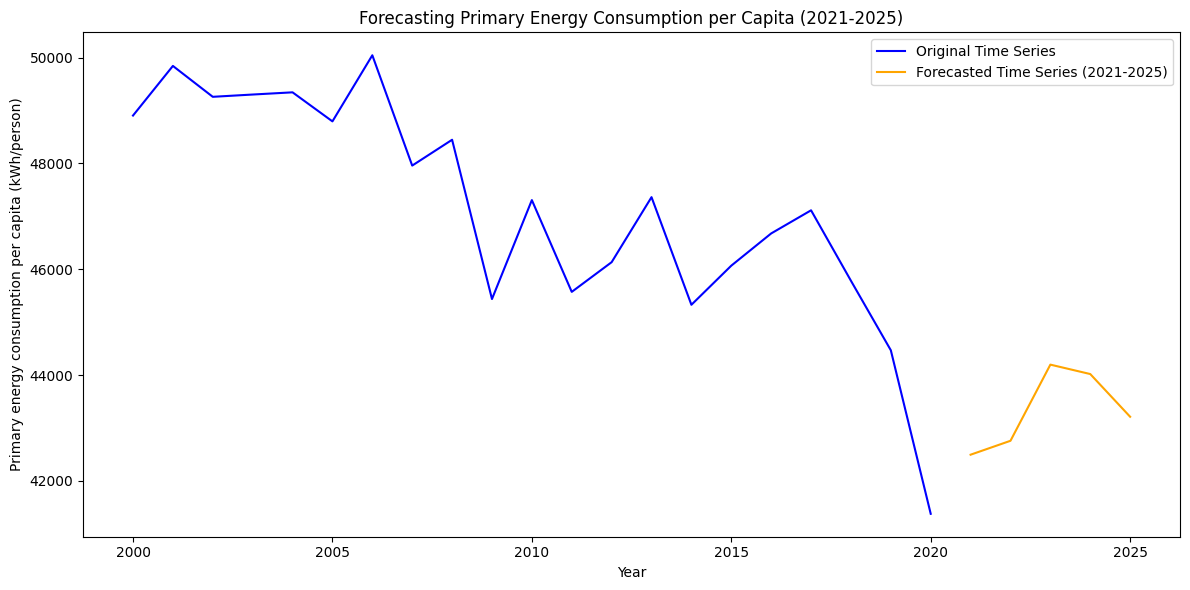

Forecasted Primary Energy Consumption per Capita (kWh/person) for 2021-2025:
Year 2021: 42494.508563932315
Year 2022: 42757.51726651764
Year 2023: 44196.596895771494
Year 2024: 44018.609234428324
Year 2025: 43211.25272471304


In [20]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# First-order differencing
diff_1 = np.diff(time_series)

# Fit the ARIMA model with (p=3, d=0, q=3)
model = ARIMA(diff_1, order=(3, 0, 3))
model_fitted = model.fit()

# Forecast the next 5 years (2021-2025)
forecast_steps = 5
forecasted_diff = model_fitted.forecast(steps=forecast_steps)

# To obtain the forecasted actual values, we need to reverse the differencing (cumulative sum)
forecasted_values = np.concatenate([time_series[-1:], np.cumsum(forecasted_diff) + time_series[-1]])

# Create a date range for the forecast years (2021-2025)
forecast_years = np.arange(2021, 2021 + forecast_steps)

# Plot the original and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_Germany.index, time_series, label='Original Time Series', color='blue')
plt.plot(forecast_years, forecasted_values[1:], label='Forecasted Time Series (2021-2025)', color='orange')
plt.title("Forecasting Primary Energy Consumption per Capita (2021-2025)")
plt.xlabel('Year')
plt.ylabel('Primary energy consumption per capita (kWh/person)')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation metrics - As there is no actual future data, we can't calculate the MSE
# However, you can evaluate the forecast performance when actual data is available in future
# For now, we will print out the forecasted values
print("Forecasted Primary Energy Consumption per Capita (kWh/person) for 2021-2025:")
for year, value in zip(forecast_years, forecasted_values[1:]):
    print(f"Year {year}: {value}")
